In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from plots import upset_plot

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # CLIENT LEVEL
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/'

centers = ['Center1', 'Center2', 'Center3']
intensities_PG_from_pep = {}
metadatas = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/pg_intensities.tsv', sep='\t')
    metadata = pd.read_csv(f'{path_to_data}/{center}/metadata.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_PG_from_pep[center] = data
    metadatas[center] = metadata
    print('')

Center: Center1
Number of samples: 22
Number of features: 491
Number of features after filtering: 490

Center: Center2
Number of samples: 21
Number of features: 516
Number of features after filtering: 508

Center: Center3
Number of samples: 22
Number of features: 438
Number of features after filtering: 425



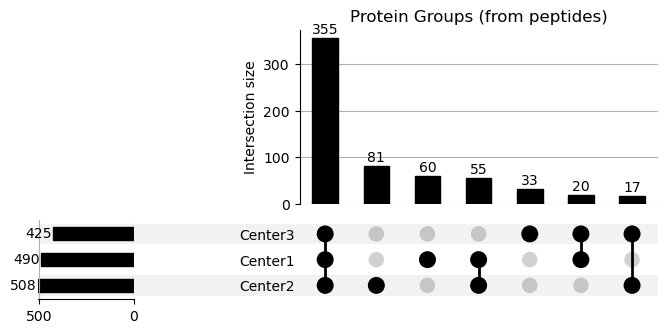

In [3]:


upset_plot.generate_upset_plot(intensities_PG_from_pep, 'Majority.protein.IDs', 'Protein Groups (from peptides)', splited=False)

In [4]:
round(355 * 100 /425, 1)

83.5

In [5]:
round(363 * 100 /438, 1)

82.9

# Sorting is needed?

In [6]:
# # CLIENT LEVEL
path_to_data = '/home/yuliya/repos/cosybio/FedProt/data/TMT_data/01_smaller_lib_balanced_PG_MajorPG/'

centers = ['Center1', 'Center2', 'Center3']
intensities_PG_from_pep = {}
metadatas = {}

for center in centers:
    data = pd.read_csv(f'{path_to_data}/{center}/for_sorting_check.tsv', sep='\t')
    metadata = pd.read_csv(f'{path_to_data}/{center}/metadata.tsv', sep='\t')

    print(f'Center: {center}')
    print(f'Number of samples: {metadata.shape[0]}')
    print(f'Number of features: {data.shape[0]}')
    ####################### Filter and replacement #######################
    # replace 0 with NaN in intensities_PG_from_pep
    data = data.replace(0, pd.NA)
    # filter rows with less then 2 non NaN values
    data = data.dropna(thresh=2)
    print(f'Number of features after filtering: {data.shape[0]}')

    intensities_PG_from_pep[center] = data
    metadatas[center] = metadata
    print('')

Center: Center1
Number of samples: 22
Number of features: 491
Number of features after filtering: 490

Center: Center2
Number of samples: 21
Number of features: 516
Number of features after filtering: 508

Center: Center3
Number of samples: 22
Number of features: 438
Number of features after filtering: 425



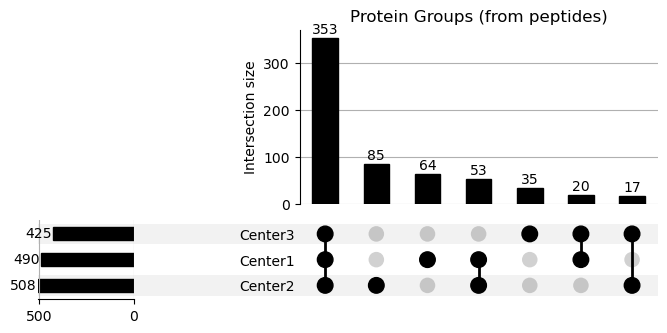

In [7]:
upset_plot.generate_upset_plot(intensities_PG_from_pep, 'Majority.protein.IDs', 'Protein Groups (from peptides)', splited=False)